# Иерархическая кластеризация

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from IPython.display import display


def find_bool_cols(df):
    temp_df_max = pd.DataFrame(df.max())
    cols_max = temp_df_max[temp_df_max == 1].dropna().T.columns
    temp_df_min = pd.DataFrame(df.min())
    cols_min = temp_df_min[temp_df_min == 0].dropna().T.columns
    return cols_min.intersection(cols_max)


def get_one_hot(column_name: str, dframe: pd.DataFrame):
    one_hot = pd.get_dummies(dframe[column_name], prefix=column_name)
    dframe = dframe.drop(column_name, axis=1)
    dframe = dframe.join(one_hot)
    return dframe


def display_cluster_corrs(df, cluser_count):
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    clutser_column_name = "Cluster" + str(cluser_count)
    df_temp_corr = get_one_hot(clutser_column_name, df)
    # df_temp_corr = df_temp_corr.drop("Cluster4", axis=1)
    cluster_one_hot_cols = [
        col for col in df_temp_corr.columns if clutser_column_name + "_" in col
    ]
    corrs = df_temp_corr.corr()[cluster_one_hot_cols]
    corrs = corrs.drop([col for col in corrs.index if "Cluster" in col], axis=0)
    for col in cluster_one_hot_cols:
        display(
            pd.DataFrame(corrs[col])
            .sort_values(by=[col], key=lambda x: abs(x), ascending=False)
            .T
        )
    pd.options.display.max_columns = 10
    pd.options.display.max_rows = 10


def display_clusters(df, cluser_count):
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    rows = []
    try:
        for cl in df["Cluster" + str(cluser_count)].unique():
            rows.append(df[df["Cluster" + str(cluser_count)] == cl].mean())
    except TypeError as e:
        raise TypeError(
            f"Dataframe has no column named {'Cluster' + str(cluser_count)}"
        ) from e

    df_cluster_means = pd.DataFrame(rows)
    df_cluster_means = df_cluster_means[
        df_cluster_means.columns.drop(list(df.filter(regex=r"Cluster\d+")))
    ]

    # display(pd.DataFrame(df_cluster_means.std().sort_values(ascending=False)).T)
    # display(pd.DataFrame(df_cluster_means.mean().sort_values(ascending=False)).T)

    temp_mean = df_cluster_means.mean()
    cols = pd.DataFrame(temp_mean).T.columns.intersection(find_bool_cols(df))
    temp_mean[cols] = 1

    df_std = (
        pd.DataFrame(df_cluster_means.std() / temp_mean)
        .sort_values(by=[0], ascending=False)
        .T
    )
    display(df_std)
    display(df_cluster_means[df_std.columns])
    display()
    pd.options.display.max_columns = 10
    pd.options.display.max_rows = 10

## Данные

In [38]:
df = pd.read_csv("../data/data.csv")

In [39]:
df = df[:6000]

In [40]:
df = df.dropna()

In [41]:
df.describe()

,Delivery_person_deliveries,Mean_person_speed,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
count,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000
mean,48.32950,39.211472,29.880333,4.623633,18.909777,76.840290,18.972792,76.903305,1.465333,0.963333,...,0.251500,0.243167,0.251333,0.254000,0.079333,0.59650,0.324167,0.783167,0.004333,0.212500
std,15.98479,6.069608,5.737029,0.318148,5.472183,3.473512,5.473824,3.473798,1.249957,0.821240,...,0.433911,0.429031,0.433816,0.435334,0.270281,0.49064,0.468102,0.412122,0.065691,0.409111
min,5.00000,19.188814,20.000000,2.500000,9.957144,72.768726,9.969778,72.778726,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,43.00000,34.821399,25.000000,4.500000,12.986047,73.896485,13.064360,73.927902,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,55.00000,38.881562,30.000000,4.700000,19.065838,76.616792,19.132624,76.646792,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
75%,59.00000,43.343109,35.000000,4.800000,22.750040,78.067079,22.812890,78.160128,3.000000,2.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000
max,67.00000,67.369916,39.000000,5.000000,30.914057,88.433452,31.035817,88.543187,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [42]:
df.head()

,Delivery_person_deliveries,Mean_person_speed,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,62,43.973896,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,2,...,0,0,0,1,0,1,0,0,0,1
1,56,47.608672,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3.0,2,...,0,0,0,1,0,0,1,1,0,0
2,54,34.625665,37.0,4.4,12.913041,77.683237,12.953041,77.723237,2.0,0,...,1,0,0,0,0,1,0,1,0,0
3,62,45.907825,28.0,4.9,17.431477,78.400350,17.451477,78.420350,0.0,1,...,0,0,1,0,0,0,1,0,0,1
4,60,34.492595,37.0,4.6,23.359407,85.325055,23.429407,85.395055,0.0,0,...,0,0,1,0,0,1,0,1,0,0


In [43]:
df = df.drop(
    [
        "Restaurant_latitude",
        "Restaurant_longitude",
        "Delivery_location_latitude",
        "Delivery_location_longitude",
        "City_Urban",
        "City_Semi-Urban",
        "City_Metropolitian",
        "Type_of_vehicle_scooter",
        "Type_of_vehicle_motorcycle",
        "Type_of_vehicle_electric_scooter",
    ], axis=1
)

In [44]:
df_w_dummies = df

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [48]:
scaled_data

array([[0.91935484, 0.51441502, 0.89473684, ..., 0.        , 0.        ,
        1.        ],
       [0.82258065, 0.58985489, 0.73684211, ..., 0.        , 0.        ,
        1.        ],
       [0.79032258, 0.32039225, 0.89473684, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5483871 , 0.44911245, 0.05263158, ..., 0.        , 1.        ,
        0.        ],
       [0.59677419, 0.3097661 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88709677, 0.32445471, 0.78947368, ..., 1.        , 0.        ,
        0.        ]])

In [49]:
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)

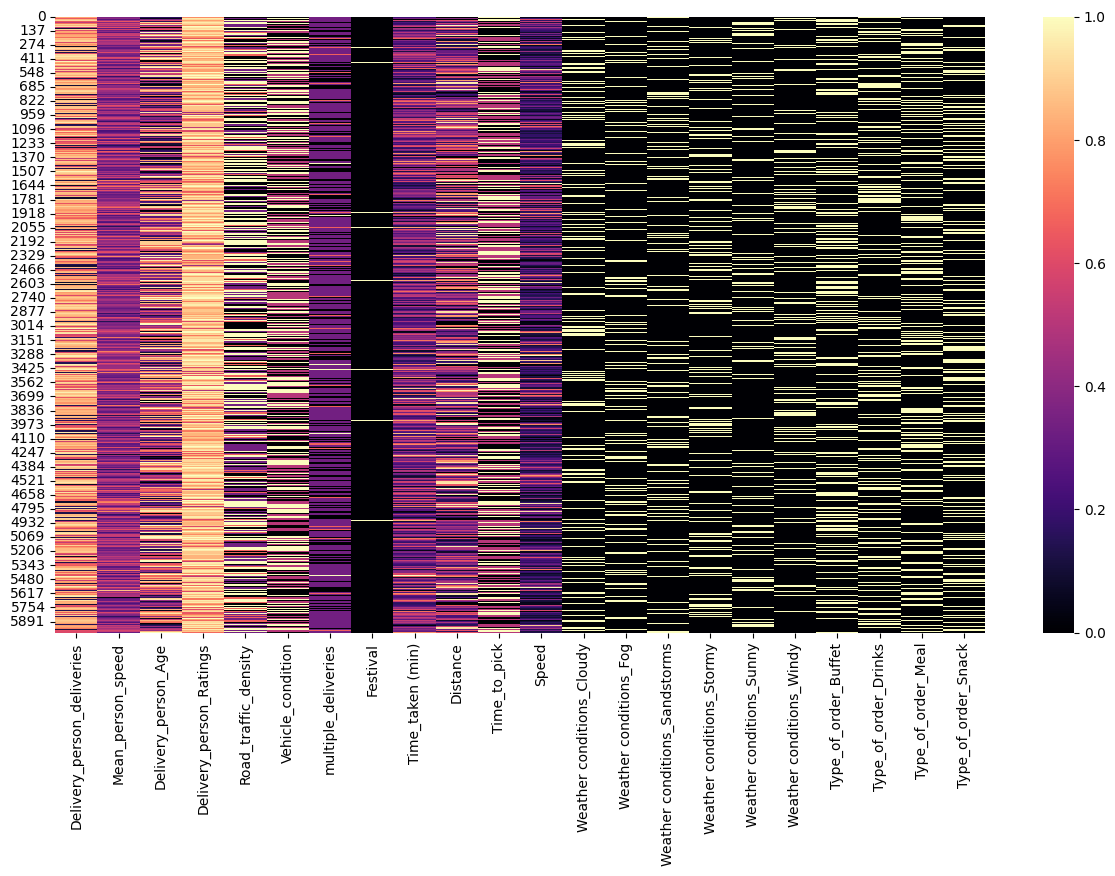

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='magma');

c:\Users\Kirill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


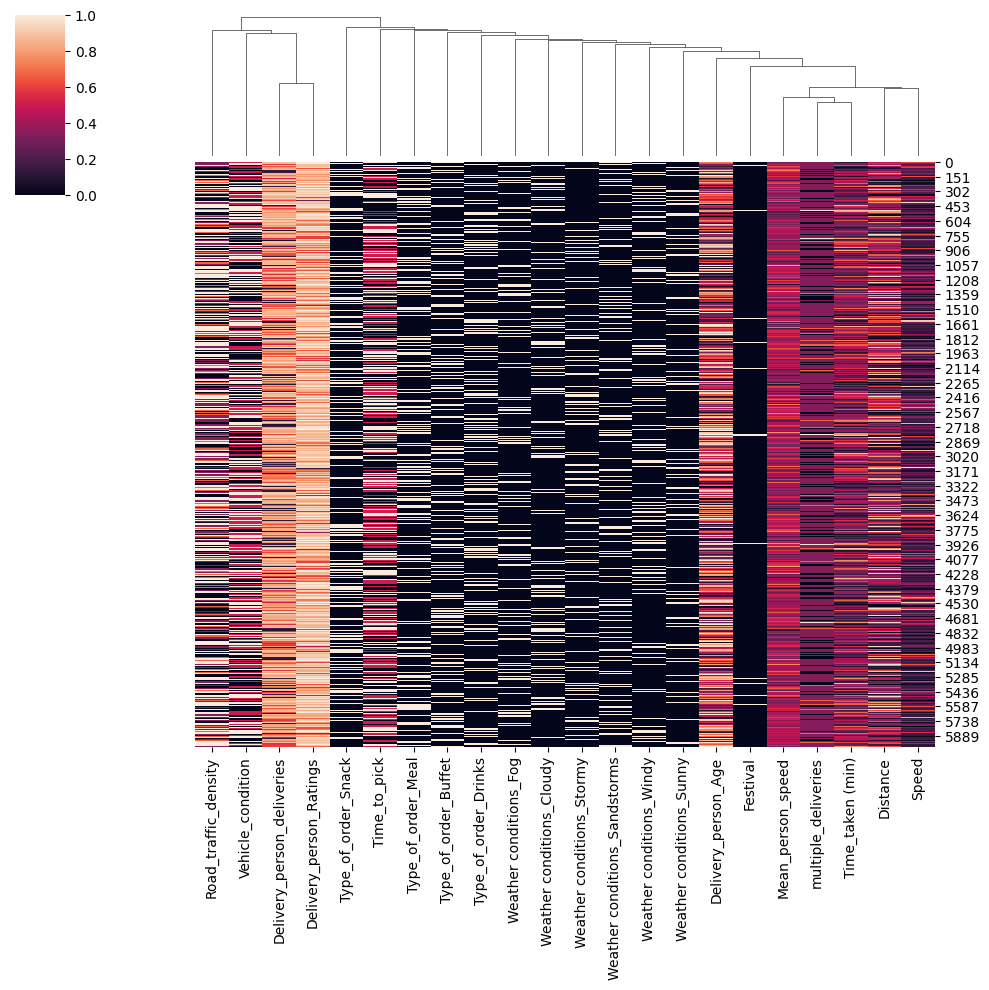

In [51]:
sns.clustermap(scaled_df,row_cluster=False)

In [52]:
# sns.clustermap(scaled_df,col_cluster=False)

## Работаем в Scikit-Learn

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
model = AgglomerativeClustering(n_clusters=4)

In [55]:
cluster_labels = model.fit_predict(scaled_df.T)

In [56]:
cluster_labels

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0],
      dtype=int64)

In [57]:
scaled_df.columns

Index(['Delivery_person_deliveries', 'Mean_person_speed',
       'Delivery_person_Age', 'Delivery_person_Ratings',
       'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries',
       'Festival', 'Time_taken (min)', 'Distance', 'Time_to_pick', 'Speed',
       'Weather conditions_Cloudy', 'Weather conditions_Fog',
       'Weather conditions_Sandstorms', 'Weather conditions_Stormy',
       'Weather conditions_Sunny', 'Weather conditions_Windy',
       'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack'],
      dtype='object')

In [58]:
def add_in_dict(d, key, value):
    if not key in d:
        d[key] = []
    d[key].append(value)

In [59]:
import collections
d = {}
d.keys()
[add_in_dict(d, cluster_labels[i], scaled_df.columns[i]) for i in range(len(cluster_labels))]
od = collections.OrderedDict(sorted(d.items()))
od

OrderedDict([(0,
              ['Mean_person_speed',
               'Delivery_person_Age',
               'Road_traffic_density',
               'Vehicle_condition',
               'multiple_deliveries',
               'Time_taken (min)',
               'Distance',
               'Time_to_pick',
               'Speed',
               'Type_of_order_Snack']),
             (1,
              ['Festival',
               'Weather conditions_Cloudy',
               'Weather conditions_Sandstorms',
               'Weather conditions_Stormy',
               'Weather conditions_Sunny',
               'Weather conditions_Windy',
               'Type_of_order_Buffet',
               'Type_of_order_Drinks']),
             (2, ['Delivery_person_deliveries', 'Delivery_person_Ratings']),
             (3, ['Weather conditions_Fog', 'Type_of_order_Meal'])])

In [60]:
# sns.clustermap(scaled_df,row_cluster=False, figsize=(40,40))

## Определяем количество кластеров с помощью дендрограмм

Почитайте онлайн-документацию:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

#### Предположим в начале, что каждая точка это отдельный кластер

In [61]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [62]:
cluster_labels = model.fit_predict(scaled_df)

In [63]:
cluster_labels

array([4955, 4593, 3796, ...,    1,    2,    0], dtype=int64)

In [64]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

## Linkage Model

In [65]:
linkage_matrix = hierarchy.linkage(model.children_)

In [66]:
linkage_matrix

array([[4.98000000e+02, 3.10700000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.98400000e+03, 5.98700000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.99300000e+03, 5.99700000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.17720000e+04, 1.19930000e+04, 3.43826991e+02, 5.99400000e+03],
       [1.18730000e+04, 1.19940000e+04, 4.45252737e+02, 5.99600000e+03],
       [1.19400000e+04, 1.19950000e+04, 5.46575704e+02, 5.99900000e+03]])

In [67]:
# plt.figure(figsize=(20,10))
# # Обратите внимание - это может занять некоторое время!
# dn = hierarchy.dendrogram(linkage_matrix)

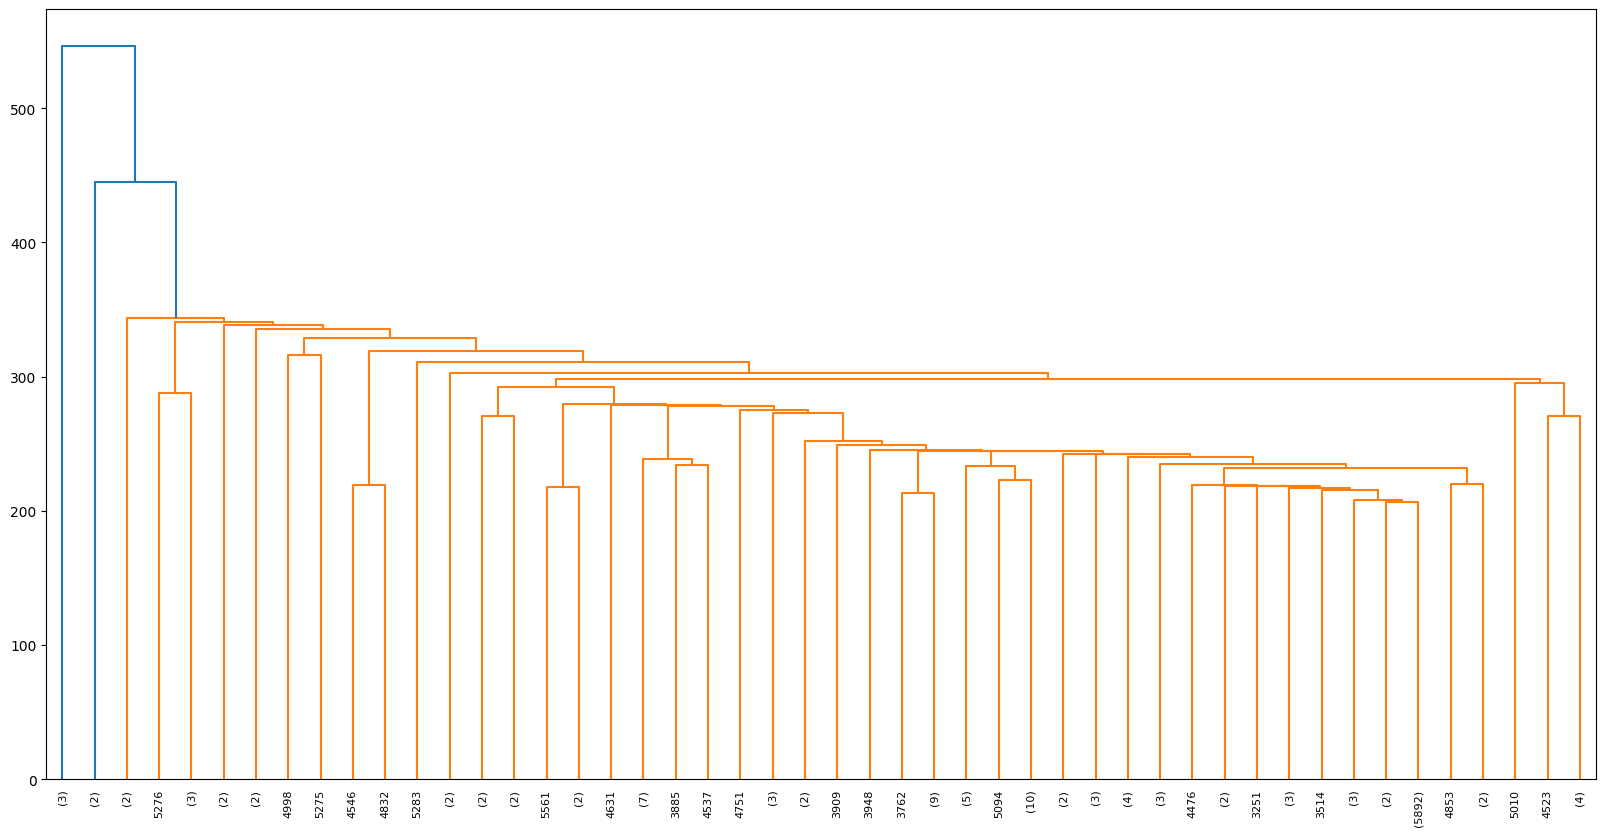

In [68]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

### Выбираем пороговое значение - Threshold Distance

**Чему равно расстояние между двумя точками?**

In [69]:
scaled_df.describe()

,Delivery_person_deliveries,Mean_person_speed,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),Distance,...,Weather conditions_Cloudy,Weather conditions_Fog,Weather conditions_Sandstorms,Weather conditions_Stormy,Weather conditions_Sunny,Weather conditions_Windy,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.698863,0.415571,0.520018,0.849453,0.488444,0.481667,0.261833,0.021500,0.356694,0.417971,...,0.17450,0.177167,0.165500,0.170500,0.145500,0.166833,0.251500,0.243167,0.251333,0.254000
std,0.257819,0.125975,0.301949,0.127259,0.416652,0.410620,0.190286,0.145056,0.194803,0.281542,...,0.37957,0.381842,0.371662,0.376103,0.352634,0.372858,0.433911,0.429031,0.433816,0.435334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.612903,0.324455,0.263158,0.800000,0.000000,0.000000,0.000000,0.000000,0.208333,0.163508,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.806452,0.408723,0.526316,0.880000,0.333333,0.500000,0.333333,0.000000,0.333333,0.395397,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.870968,0.501323,0.789474,0.920000,1.000000,1.000000,0.333333,0.000000,0.479167,0.622606,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Модель на основе параметра n_clusters

In [70]:
n_clusters = 4
model = AgglomerativeClustering(n_clusters=n_clusters,distance_threshold=None)
cluster_labels = model.fit_predict(scaled_data)
df[f"Cluster{n_clusters}"] = cluster_labels
np.unique(cluster_labels)

array([0, 1, 2, 3], dtype=int64)

In [71]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix

array([[4.98000000e+02, 3.10700000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.98400000e+03, 5.98700000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.99300000e+03, 5.99700000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.17720000e+04, 1.19930000e+04, 3.43826991e+02, 5.99400000e+03],
       [1.18730000e+04, 1.19940000e+04, 4.45252737e+02, 5.99600000e+03],
       [1.19400000e+04, 1.19950000e+04, 5.46575704e+02, 5.99900000e+03]])

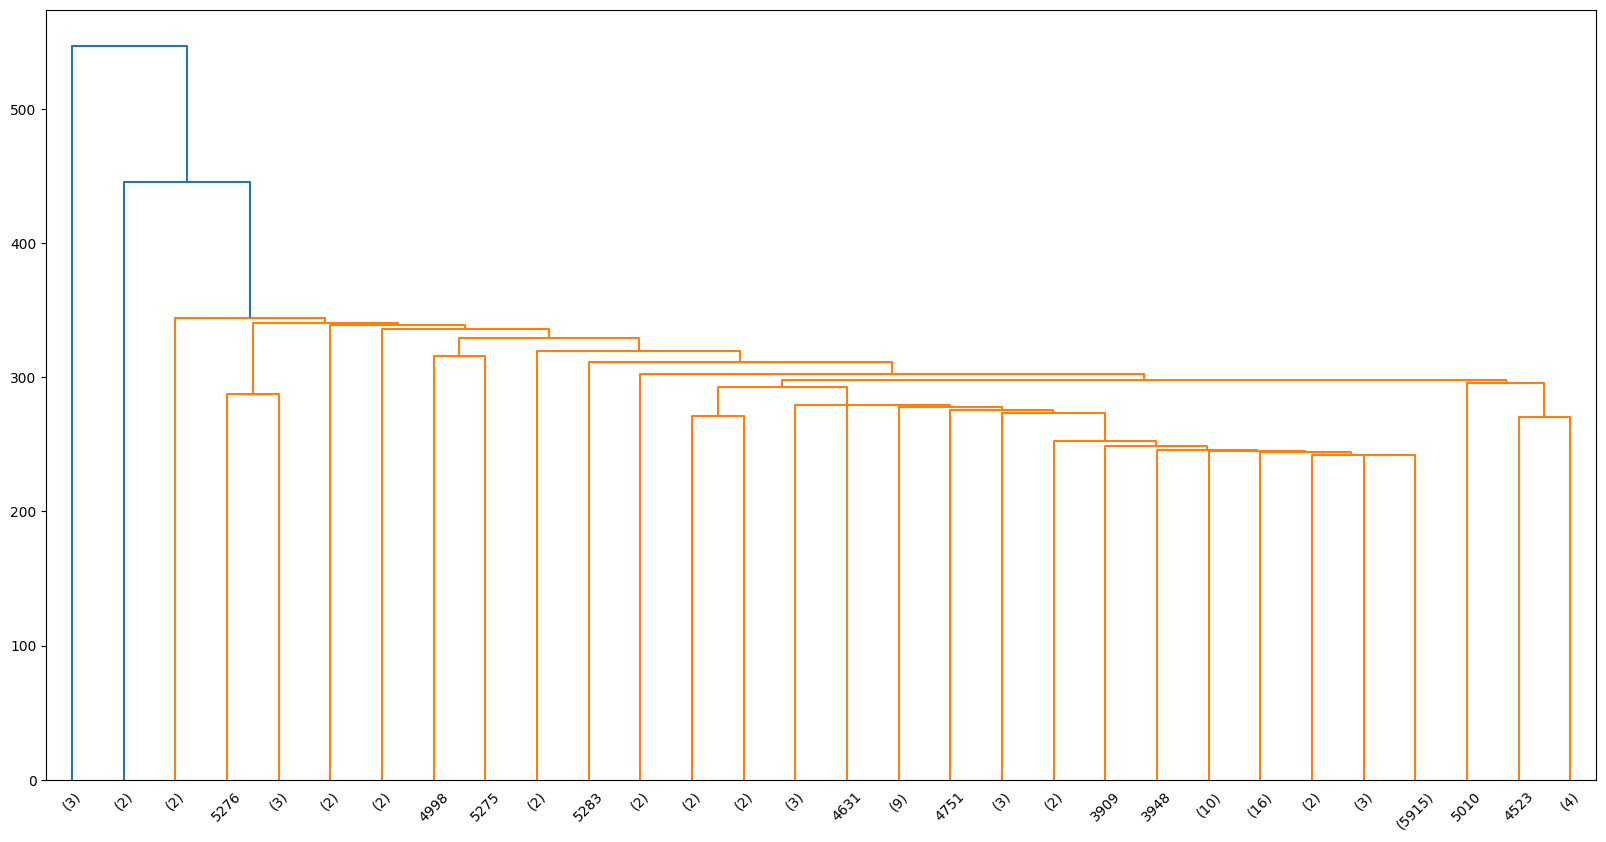

In [72]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp')

In [73]:
display_clusters(df, n_clusters)

,Weather conditions_Sunny,Weather conditions_Sandstorms,Type_of_order_Meal,Weather conditions_Fog,Speed,Type_of_order_Snack,Type_of_order_Buffet,Weather conditions_Cloudy,Type_of_order_Drinks,Weather conditions_Windy,Weather conditions_Stormy,Time_taken (min),multiple_deliveries,Road_traffic_density,Distance,Time_to_pick,Vehicle_condition,Festival,Delivery_person_Age,Delivery_person_Ratings,Delivery_person_deliveries,Mean_person_speed
0,0.5,0.5,0.432577,0.152067,0.150517,0.147216,0.145298,0.14512,0.14055,0.140439,0.140288,0.140089,0.077468,0.023936,0.021959,0.021036,0.018478,0.007872,0.007856,0.00422,0.003625,0.003457


,Weather conditions_Sunny,Weather conditions_Sandstorms,Type_of_order_Meal,Weather conditions_Fog,Speed,Type_of_order_Snack,Type_of_order_Buffet,Weather conditions_Cloudy,Type_of_order_Drinks,Weather conditions_Windy,Weather conditions_Stormy,Time_taken (min),multiple_deliveries,Road_traffic_density,Distance,Time_to_pick,Vehicle_condition,Festival,Delivery_person_Age,Delivery_person_Ratings,Delivery_person_deliveries,Mean_person_speed
0,1.0,0.0,0.241695,0.000000,49.209503,0.261168,0.254296,0.000000,0.242841,0.000000,0.000000,13.931271,0.687285,1.482245,9.301593,9.261168,0.938144,0.013746,30.279496,4.649485,48.603666,39.274320
1,0.0,0.0,0.000000,0.251371,37.342282,0.343014,0.335269,0.255244,0.321717,0.241045,0.252339,19.131010,0.809293,1.481446,9.793113,9.586964,0.978703,0.024524,29.737657,4.621975,48.272023,39.229355
2,0.0,1.0,0.263847,0.000000,38.905030,0.234642,0.249748,0.000000,0.251762,0.000000,0.000000,17.647533,0.764350,1.407855,9.457205,9.491440,0.945619,0.012085,29.845921,4.602014,48.397784,39.311394
3,0.0,0.0,1.000000,0.274396,35.786768,0.000000,0.000000,0.247343,0.000000,0.245411,0.232850,19.086957,0.817391,1.457971,9.441628,9.739130,0.955556,0.028019,30.003865,4.627536,48.204831,39.009050


### Создаём модель на основе параметра Distance Threshold

* distance_threshold
    * Расстояние linkage, выше которого кластеры уже не объединяются.

Евклидово расстояние

In [74]:
np.sqrt(len(scaled_df.columns))

4.69041575982343

In [75]:
# # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
# a = scaled_df.iloc[320]
# b = scaled_df.iloc[28]
# dist = np.linalg.norm(a-b)
# dist

In [76]:
distance_threshold = 25
model = AgglomerativeClustering(n_clusters=None,distance_threshold=distance_threshold, compute_full_tree=True)
cluster_labels = model.fit_predict(scaled_data)
n_clusters = len(np.unique(cluster_labels))
df[f"Cluster{n_clusters}"] = cluster_labels
n_clusters

7

### Матрица связей - Linkage Matrix

Источник: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage


In [77]:
linkage_matrix = hierarchy.linkage(model.children_)

In [78]:
linkage_matrix

array([[4.98000000e+02, 3.10700000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.98400000e+03, 5.98700000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.99300000e+03, 5.99700000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.17720000e+04, 1.19930000e+04, 3.43826991e+02, 5.99400000e+03],
       [1.18730000e+04, 1.19940000e+04, 4.45252737e+02, 5.99600000e+03],
       [1.19400000e+04, 1.19950000e+04, 5.46575704e+02, 5.99900000e+03]])

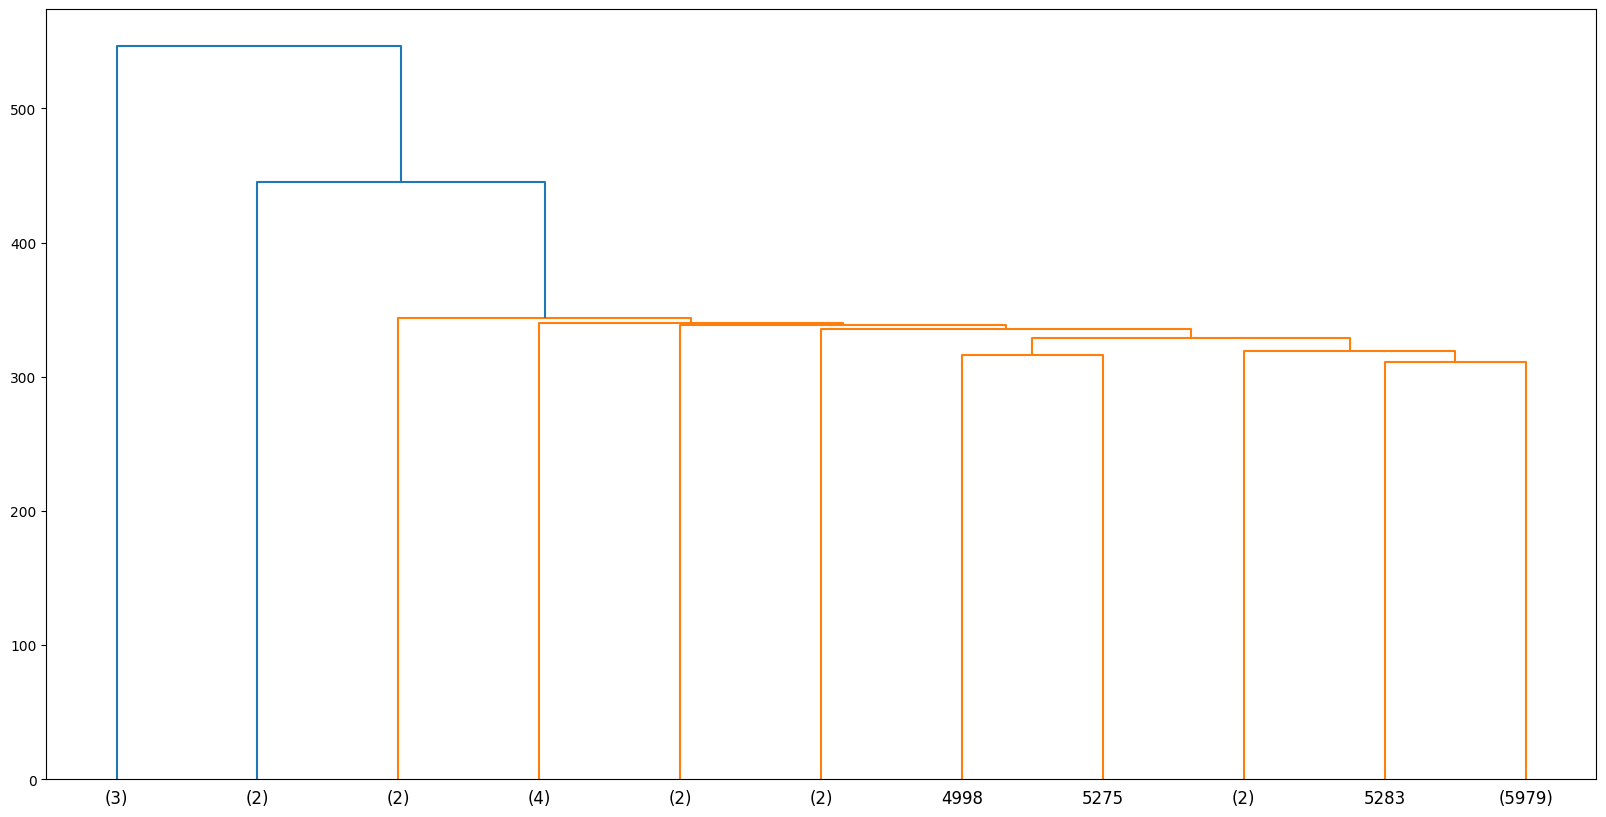

In [79]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=11)

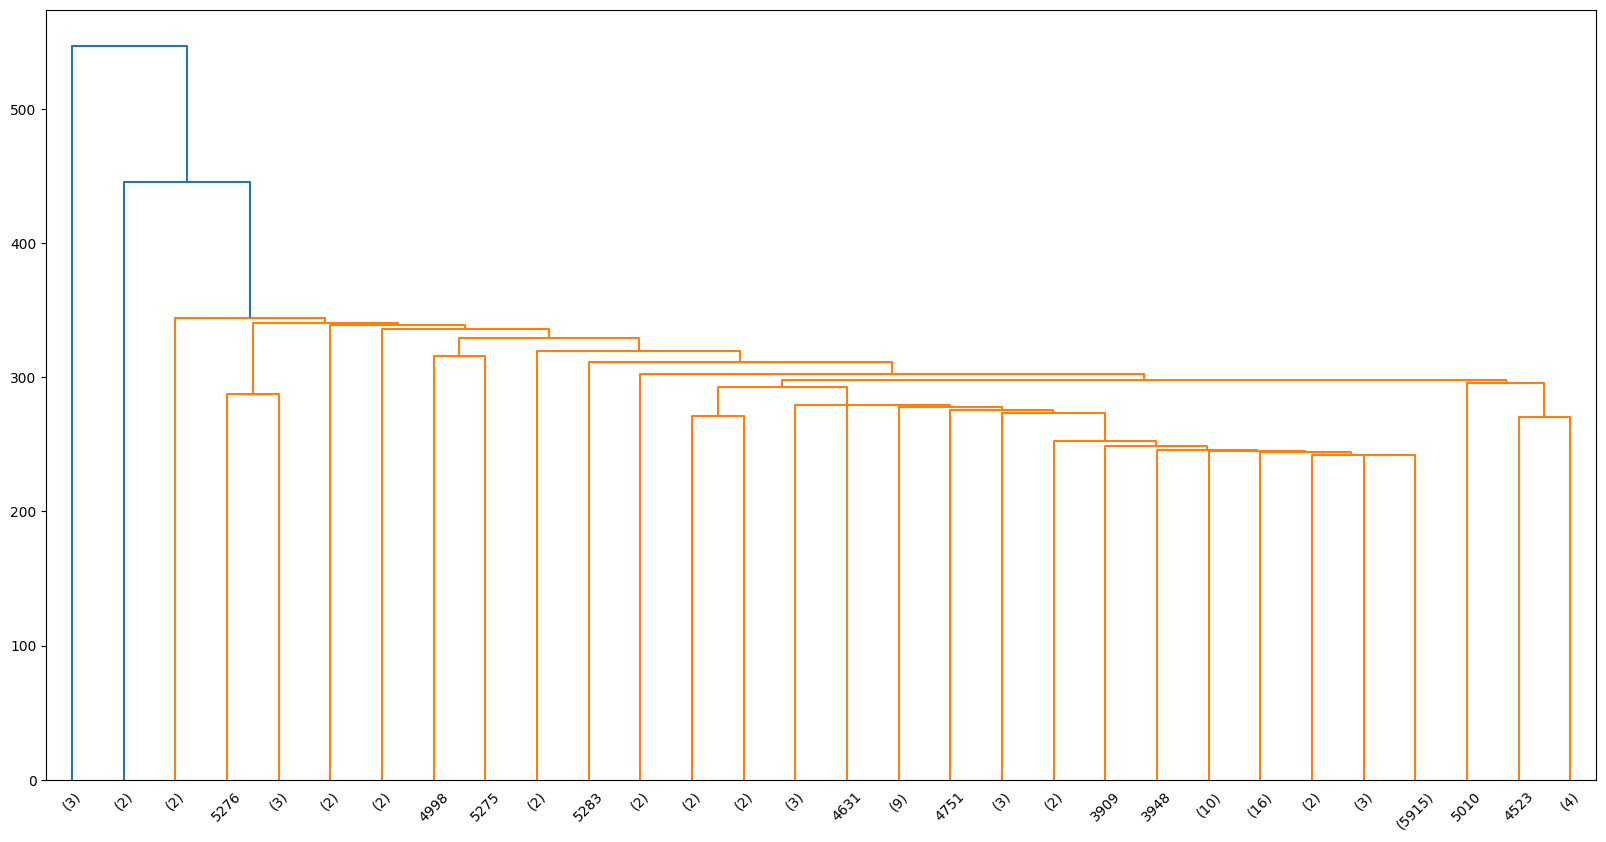

In [80]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp')

<AxesSubplot: >

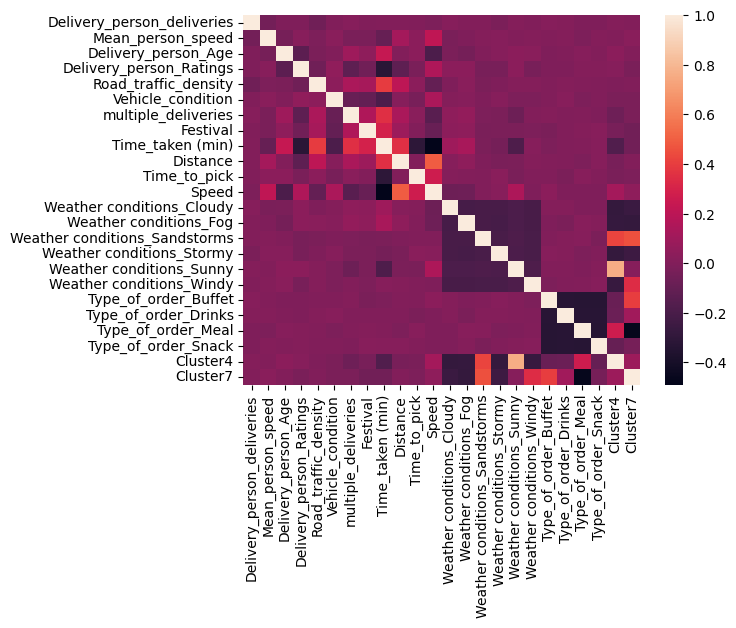

In [81]:
sns.heatmap(df.corr())

In [82]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[so != 1].nlargest(50)

Cluster4                  Weather conditions_Sunny    0.757161
Weather conditions_Sunny  Cluster4                    0.757161
Speed                     Time_taken (min)            0.489565
Time_taken (min)          Speed                       0.489565
Distance                  Speed                       0.488858
                                                        ...   
Cluster7                  Weather conditions_Fog      0.283173
Weather conditions_Fog    Cluster4                    0.278091
Cluster4                  Weather conditions_Fog      0.278091
                          Weather conditions_Windy    0.273531
Weather conditions_Windy  Cluster4                    0.273531
Length: 50, dtype: float64

In [83]:
df.columns

Index(['Delivery_person_deliveries', 'Mean_person_speed',
       'Delivery_person_Age', 'Delivery_person_Ratings',
       'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries',
       'Festival', 'Time_taken (min)', 'Distance', 'Time_to_pick', 'Speed',
       'Weather conditions_Cloudy', 'Weather conditions_Fog',
       'Weather conditions_Sandstorms', 'Weather conditions_Stormy',
       'Weather conditions_Sunny', 'Weather conditions_Windy',
       'Type_of_order_Buffet', 'Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack', 'Cluster4', 'Cluster7'],
      dtype='object')

In [84]:
display_clusters(df, n_clusters)
# Вернуть айди курьеров чтобы выделить конкретных и проанализировать их поведение

,Weather conditions_Sunny,Weather conditions_Sandstorms,Weather conditions_Windy,Type_of_order_Meal,Type_of_order_Snack,Type_of_order_Drinks,Type_of_order_Buffet,Weather conditions_Cloudy,Weather conditions_Fog,Weather conditions_Stormy,Speed,Time_taken (min),multiple_deliveries,Vehicle_condition,Distance,Road_traffic_density,Time_to_pick,Delivery_person_deliveries,Delivery_person_Age,Festival,Mean_person_speed,Delivery_person_Ratings
0,0.377964,0.377964,0.373865,0.366111,0.356109,0.354655,0.354452,0.170986,0.170896,0.168241,0.119505,0.110275,0.061029,0.043815,0.027412,0.023168,0.016242,0.011431,0.010696,0.010466,0.004394,0.003842


,Weather conditions_Sunny,Weather conditions_Sandstorms,Weather conditions_Windy,Type_of_order_Meal,Type_of_order_Snack,Type_of_order_Drinks,Type_of_order_Buffet,Weather conditions_Cloudy,Weather conditions_Fog,Weather conditions_Stormy,Speed,Time_taken (min),multiple_deliveries,Vehicle_condition,Distance,Road_traffic_density,Time_to_pick,Delivery_person_deliveries,Delivery_person_Age,Festival,Mean_person_speed,Delivery_person_Ratings
0,1.0,0.0,0.000000,0.241695,0.261168,0.242841,0.254296,0.000000,0.000000,0.000000,49.209503,13.931271,0.687285,0.938144,9.301593,1.482245,9.261168,48.603666,30.279496,0.013746,39.274320,4.649485
1,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.324937,0.352645,0.322418,36.397538,19.929471,0.822418,0.983627,10.070796,1.458438,9.609572,47.560453,29.721662,0.039043,39.018633,4.624937
2,0.0,0.0,1.000000,0.000000,0.360107,0.322624,0.317269,0.000000,0.000000,0.000000,39.043638,18.374833,0.797858,0.925033,9.852357,1.496653,9.491299,47.682731,30.218206,0.010710,39.470044,4.599197
3,0.0,1.0,0.000000,0.263847,0.234642,0.251762,0.249748,0.000000,0.000000,0.000000,38.905030,17.647533,0.764350,0.945619,9.457205,1.407855,9.491440,48.397784,29.845921,0.012085,39.311394,4.602014
4,0.0,0.0,0.245411,1.000000,0.000000,0.000000,0.000000,0.247343,0.274396,0.232850,35.786768,19.086957,0.817391,0.955556,9.441628,1.457971,9.739130,48.204831,30.003865,0.028019,39.009050,4.627536
5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.337905,0.324190,0.337905,37.754700,18.821696,0.817955,0.955112,9.642589,1.460100,9.669576,48.804239,29.382793,0.019950,39.316716,4.634913
6,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.346561,0.316138,0.337302,36.215898,19.367725,0.797619,1.051587,9.602615,1.513228,9.570106,49.037037,29.656085,0.027778,39.120167,4.627646


In [85]:
display_cluster_corrs(df, n_clusters)

,Type_of_order_Meal,Type_of_order_Snack,Type_of_order_Buffet,Type_of_order_Drinks,Weather conditions_Sandstorms,Weather conditions_Sunny,Weather conditions_Fog,Weather conditions_Windy,Weather conditions_Cloudy,Weather conditions_Stormy,Speed,Time_taken (min),multiple_deliveries,Time_to_pick,Festival,Mean_person_speed,Distance,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,Delivery_person_deliveries,Road_traffic_density
Cluster7_0,0.788006,-0.266415,-0.264657,-0.258799,-0.203328,-0.188402,0.116268,0.096228,0.087628,0.075697,-0.052015,0.047154,0.025509,0.02133,0.020522,-0.015228,-0.013634,0.009832,0.005602,-0.004324,-0.003561,-0.002689


,Type_of_order_Snack,Type_of_order_Buffet,Type_of_order_Meal,Type_of_order_Drinks,Weather conditions_Fog,Weather conditions_Windy,Weather conditions_Sandstorms,Weather conditions_Sunny,Weather conditions_Stormy,Weather conditions_Cloudy,Time_taken (min),Festival,Speed,Distance,multiple_deliveries,Delivery_person_deliveries,Mean_person_speed,Delivery_person_Age,Vehicle_condition,Time_to_pick,Road_traffic_density,Delivery_person_Ratings
Cluster7_1,0.669284,-0.226376,-0.226276,-0.221366,0.179488,-0.174757,-0.173918,-0.161151,0.15776,0.154795,0.075525,0.047234,-0.036188,0.033147,0.025258,-0.018791,-0.012409,-0.010802,0.009651,0.005747,-0.002154,0.0016


,Type_of_order_Drinks,Type_of_order_Snack,Type_of_order_Buffet,Type_of_order_Meal,Weather conditions_Cloudy,Weather conditions_Windy,Weather conditions_Sandstorms,Weather conditions_Stormy,Weather conditions_Sunny,Weather conditions_Fog,Time_taken (min),Vehicle_condition,Speed,Delivery_person_deliveries,Festival,Delivery_person_Age,Road_traffic_density,multiple_deliveries,Mean_person_speed,Delivery_person_Ratings,Time_to_pick,Distance
Cluster7_2,0.66985,-0.221553,-0.220091,-0.219994,0.17213,-0.169905,-0.169089,0.168407,-0.156677,0.1382,0.050616,0.040807,-0.037584,0.016808,0.016434,-0.014843,0.01455,0.008061,-0.005712,0.004789,0.001886,-0.000191


,Weather conditions_Sunny,Weather conditions_Fog,Weather conditions_Cloudy,Weather conditions_Stormy,Time_taken (min),Weather conditions_Windy,Weather conditions_Sandstorms,Speed,multiple_deliveries,Delivery_person_Ratings,Time_to_pick,Delivery_person_Age,Distance,Festival,Vehicle_condition,Type_of_order_Meal,Delivery_person_deliveries,Type_of_order_Snack,Road_traffic_density,Mean_person_speed,Type_of_order_Buffet,Type_of_order_Drinks
Cluster7_3,1.0,-0.191474,-0.189721,-0.187081,-0.184925,-0.184651,-0.183764,0.145811,-0.071,0.033532,-0.02944,0.028713,-0.02286,-0.022061,-0.012658,-0.009168,0.007078,0.006795,0.005583,0.004273,0.002659,-0.000313


,Type_of_order_Buffet,Type_of_order_Snack,Type_of_order_Meal,Type_of_order_Drinks,Weather conditions_Windy,Weather conditions_Sandstorms,Weather conditions_Stormy,Weather conditions_Cloudy,Weather conditions_Sunny,Weather conditions_Fog,Delivery_person_Age,Time_taken (min),multiple_deliveries,Speed,Delivery_person_Ratings,Delivery_person_deliveries,Time_to_pick,Mean_person_speed,Festival,Vehicle_condition,Distance,Road_traffic_density
Cluster7_4,0.677635,-0.229201,-0.227588,-0.222649,-0.17577,-0.174926,0.174851,0.169114,-0.162086,0.151254,-0.034068,0.029423,0.022334,-0.017839,0.013927,0.011667,0.011602,0.006811,-0.004197,-0.003932,0.002666,-0.001645


,Weather conditions_Sandstorms,Weather conditions_Fog,Weather conditions_Cloudy,Weather conditions_Stormy,Weather conditions_Windy,Weather conditions_Sunny,Delivery_person_Ratings,Festival,Time_taken (min),Road_traffic_density,Type_of_order_Snack,multiple_deliveries,Type_of_order_Meal,Distance,Vehicle_condition,Type_of_order_Drinks,Mean_person_speed,Time_to_pick,Delivery_person_Age,Speed,Delivery_person_deliveries,Type_of_order_Buffet
Cluster7_5,1.0,-0.206643,-0.204751,-0.201902,-0.199279,-0.183764,-0.030264,-0.028908,-0.022567,-0.02048,-0.019804,-0.0165,0.012847,-0.012033,-0.009607,0.008923,0.007332,-0.006442,-0.002671,-0.002391,0.001903,-0.001798


,Weather conditions_Windy,Type_of_order_Meal,Weather conditions_Fog,Weather conditions_Cloudy,Weather conditions_Stormy,Weather conditions_Sandstorms,Weather conditions_Sunny,Type_of_order_Snack,Type_of_order_Drinks,Type_of_order_Buffet,Delivery_person_Ratings,Festival,Delivery_person_Age,Vehicle_condition,Distance,Mean_person_speed,Delivery_person_deliveries,Time_taken (min),Road_traffic_density,multiple_deliveries,Time_to_pick,Speed
Cluster7_6,0.842716,-0.218493,-0.174981,-0.173379,-0.170966,-0.167935,-0.155608,0.091921,0.069845,0.057163,-0.028967,-0.028054,0.022211,-0.017588,0.016985,0.016066,-0.015259,0.010224,0.00945,0.008164,-0.005468,-0.000205


Для каждого курьера средняя скорость. Не забыть уникальность курьеров по айди.

Красный желтый зеленый сотрудник-курьер

Оставить часть данных на выборку для верификации. К какому кластеру будет отнесен курьер.

Назначить каждому курьеру тип и запихать этих курьеров в модель, чтобы предсказать время.

Яндекс такси документальный фильм.
